## Buscar correspondência do dlib no mediapipe
Obs.: Consideramos as labels iniciando do 1 e não do 0 (melhor padronizar e iniciar do 0)

In [1]:
import math
import os
import csv
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
os.listdir('../../data')

['processed',
 'raw',
 'interim',
 'external',
 'annotations',
 'README.md',
 'outputs',
 '__init__.py',
 'examples']

Obs: Para gerar o .csv com as landmarks para uma imagem específica, podemos utilizar os seguintes códigos:
- **Mediapipe:** FacialActionLibras/src/features/mediapipe/image_face_mesh_labels.py
- **Dlib:** FacialActionLibras/src/features/dlib/image_landmarks_labels.py

A imagem utilizada como referência para o cálculo das landmarks está localizada em: *FacialActionLibras/notebooks/feature_extraction/images/face_reference02.jpeg* e foi obtida do site [This Person do not Exist](https://thispersondoesnotexist.com/), que gera imagens de faces a partir de uma StyleGAN2. 

Ela foi escolhida por possuir uma face mais centralizada (o que permite a geração de uma máscara de pontos mais bem definida) e por não conter artefatos na face que poderiam influenciar a detecção de landmarks (e.g. óculos, chapéu, etc.). Podemos observá-la a seguir:

![Face utilizada como referência para o cálculo de distância entre landmarks](./images/face_reference02.jpeg)

In [2]:
df_mpipe = pd.read_csv('./data/face_reference02_landmaks_mediapipe.csv', sep=';', names=['landmark', 'x', 'y'], header=0)
df_mpipe.head(4)

,landmark,x,y
0,1,506,721
1,2,502,667
2,3,504,684
3,4,485,577


In [3]:
df_dlib = pd.read_csv('./data/face_reference02_landmaks_dlib.csv', sep=';', names=['landmark', 'x', 'y'], header=0)
df_dlib.head(4)

,landmark,x,y
0,1,227,482
1,2,235,559
2,3,245,634
3,4,257,706


In [4]:
def calculate_distance_euc(x1, y1, row):
    x2 = row['x']
    y2 = row['y']
    dist = math.sqrt( (x2 - x1)**2 + (y2 - y1)**2 )
    return dist

def calculate_distance(x1_dlib, y1_dlib, df_media):
    df_media["diff_distance"] = df_media.apply(lambda row: calculate_distance_euc(x1_dlib, y1_dlib, row), axis=1)
    landmark_nearest_mpipe = int(df_media.loc[df_media['diff_distance'].idxmin()]['landmark'])
    x = int(df_media.loc[df_media['diff_distance'].idxmin()]['x'])
    y = int(df_media.loc[df_media['diff_distance'].idxmin()]['y'])
    #land = int(df_media.loc[df_media['diff_distance'].idxmin()]['landmark'])
    return landmark_nearest_mpipe, x, y

In [5]:
df_dlib['landmark_mpipe'], df_dlib['x_mpipe'], df_dlib['y_mpipe'] = zip(*df_dlib.apply(lambda x: calculate_distance(x['x'], x['y'], df_mpipe.copy()), axis=1))
df_dlib

,landmark,x,y,landmark_mpipe,x_mpipe,y_mpipe
0,1,227,482,128,237,498
1,2,235,559,228,237,555
2,3,245,634,148,255,648
3,4,257,706,216,260,712
4,5,279,772,139,285,757
...,...,...,...,...,...,...
63,64,551,732,303,545,727
64,65,629,728,309,629,726
65,66,550,767,318,543,772
66,67,511,773,15,509,775


Validando que para a face utilizada como referência anteriormente, face_reference_01.png, obtivemos ids repetidos na região da boca, devido à proximidade dos pontos pela boca estar fechada.

In [32]:
len(df_dlib['landmark_mpipe'].to_list())

68

In [40]:
df_mpipe['landmark'].min(), df_mpipe['landmark'].max()

(1, 468)

In [38]:
df_dlib['landmark_mpipe'].value_counts()

313    2
14     2
39     2
35     1
154    1
      ..
169    1
198    1
6      1
5      1
307    1
Name: landmark_mpipe, Length: 65, dtype: int64

In [33]:
np.unique(sorted(df_dlib['landmark_mpipe'].to_list()), return_counts=True)

(array([  3,   5,   6,  10,  12,  14,  17,  35,  39,  63,  64,  73,  74,
         76,  86,  98, 106, 108, 137, 139, 145, 148, 151, 153, 154, 156,
        159, 160, 162, 163, 169, 177, 181, 192, 198, 214, 228, 289, 292,
        294, 297, 303, 306, 307, 311, 313, 316, 321, 324, 327, 335, 337,
        354, 357, 362, 366, 374, 378, 379, 381, 383, 386, 387, 391, 398]),
 array([1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

In [36]:
np.unique(sorted(np.array( [34, 227, 147, 215, 138, 136, 150, 176, 152, 377, 378, 365, 397, 288, 361, 323, 356, 162, 63, 105, 107, 9, 336, 296, 334, 293, 353, 168, 197, 5, 4, 75, 97, 2, 326, 305, 161, 27, 158, 155, 153, 144, 382, 385, 386, 390, 373, 380, 62, 73, 72, 11, 302, 310, 291, 320, 315, 16, 85, 89, 96, 38, 13, 312, 292, 312, 13, 38])), return_counts=True)

(array([  2,   4,   5,   9,  11,  13,  16,  27,  34,  38,  62,  63,  72,
         73,  75,  85,  89,  96,  97, 105, 107, 136, 138, 144, 147, 150,
        152, 153, 155, 158, 161, 162, 168, 176, 197, 215, 227, 288, 291,
        292, 293, 296, 302, 305, 310, 312, 315, 320, 323, 326, 334, 336,
        353, 356, 361, 365, 373, 377, 378, 380, 382, 385, 386, 390, 397]),
 array([1, 1, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]))

Verificação dos ids gerados para a face de referência final, face_reference02.jpeg. Escolhemos uma face de referência melhor para não gerar ids duplicados.

In [6]:
np.unique(sorted(df_dlib['landmark_mpipe'].to_list()), return_counts=True)

(array([  1,   3,   5,   6,  14,  15,  18,  38,  40,  56,  64,  67,  71,
         76,  77,  79,  83,  85,  88,  98, 108, 128, 137, 139, 145, 148,
        149, 150, 153, 154, 156, 159, 160, 169, 181, 198, 216, 228, 247,
        268, 286, 292, 294, 297, 301, 303, 305, 309, 315, 318, 322, 324,
        329, 337, 357, 366, 368, 374, 379, 381, 383, 386, 387, 401, 436,
        448, 461, 467]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]))

### Conjunto de landmarks correspondentes entre Dlib e Mediapipe

Para padronizar o nosso processo, utilizaremos, a partir daqui, os landmarks começados a partir de Zero.

In [7]:
df_dlib['landmark_mpipe'] = df_dlib['landmark_mpipe']-1

In [8]:
np.unique(sorted(df_dlib['landmark_mpipe'].to_list()), return_counts=True)

(array([  0,   2,   4,   5,  13,  14,  17,  37,  39,  55,  63,  66,  70,
         75,  76,  78,  82,  84,  87,  97, 107, 127, 136, 138, 144, 147,
        148, 149, 152, 153, 155, 158, 159, 168, 180, 197, 215, 227, 246,
        267, 285, 291, 293, 296, 300, 302, 304, 308, 314, 317, 321, 323,
        328, 336, 356, 365, 367, 373, 378, 380, 382, 385, 386, 400, 435,
        447, 460, 466]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1]))

O array abaixo será carregado no arquivo *FacialActionLibras/src/features/mediapipe/image_face_mesh_take.py*, na constante LANDMARK_IDS.

In [9]:
np.array(df_dlib['landmark_mpipe'].to_list())

array([127, 227, 147, 215, 138, 136, 149, 148, 152, 400, 378, 365, 367,
       435, 323, 447, 356,  70,  63,  66, 107,  55, 285, 336, 296, 293,
       300, 168, 197,   5,   4,  75,  97,   2, 328, 460, 246, 159, 158,
       155, 153, 144, 382, 385, 386, 466, 373, 380,  76,  39,  37,   0,
       267, 304, 291, 321, 314,  17,  84, 180,  78,  82,  13, 302, 308,
       317,  14,  87])

In [ ]:
[127 227 147 215 138 136 149 148 152 400 378 365 367 435 323 447 356  70
  63  66 107  55 285 336 296 293 300 168 197   5   4  75  97   2 328 460
 246 159 158 155 153 144 382 385 386 466 373 380  76  39  37   0 267 304
 291 321 314  17  84 180  78  82  13 302 308 317  14  87]

In [10]:
df_dlib.to_csv(
        "../../data/examples/lands_mp_match_dlib_682d_ref02" + str(".csv"), sep=";"
    )

<AxesSubplot:xlabel='x', ylabel='y'>

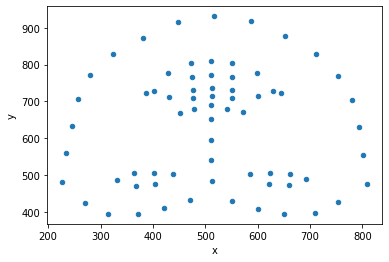

In [54]:
df_dlib.plot.scatter(x='x', y='y')

<AxesSubplot:xlabel='x_mpipe', ylabel='y_mpipe'>

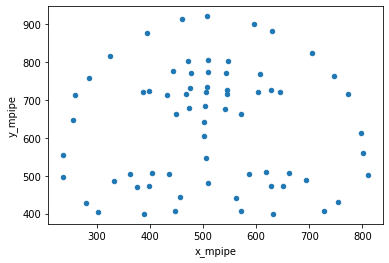

In [55]:
df_dlib.plot.scatter(x='x_mpipe', y='y_mpipe')

In [56]:
df_dlib.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 68 entries, 0 to 67
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   landmark        68 non-null     int64
 1   x               68 non-null     int64
 2   y               68 non-null     int64
 3   landmark_mpipe  68 non-null     int64
 4   x_mpipe         68 non-null     int64
 5   y_mpipe         68 non-null     int64
dtypes: int64(6)
memory usage: 3.7 KB


Detect landmarks via mediapipe
filtrar landmarks correspondentes
ordenar
exportar